<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem" data-toc-modified-id="Problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem</a></span></li><li><span><a href="#Takeaways" data-toc-modified-id="Takeaways-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Takeaways</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Data-Loading" data-toc-modified-id="Data-Loading-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data Loading</a></span></li><li><span><a href="#Data-Quality-Checks" data-toc-modified-id="Data-Quality-Checks-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Data Quality Checks</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Releases" data-toc-modified-id="Releases-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Releases</a></span></li><li><span><a href="#Sales" data-toc-modified-id="Sales-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Sales</a></span></li><li><span><a href="#Market-Misalignment" data-toc-modified-id="Market-Misalignment-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Market Misalignment</a></span></li><li><span><a href="#Genres-x-Platforms" data-toc-modified-id="Genres-x-Platforms-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Genres x Platforms</a></span></li></ul></li><li><span><a href="#Q1:-Comparing-Markets" data-toc-modified-id="Q1:-Comparing-Markets-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Q1: Comparing Markets</a></span><ul class="toc-item"><li><span><a href="#Sales" data-toc-modified-id="Sales-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Sales</a></span></li><li><span><a href="#Genre" data-toc-modified-id="Genre-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Genre</a></span></li><li><span><a href="#Platform" data-toc-modified-id="Platform-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Platform</a></span></li><li><span><a href="#Publisher" data-toc-modified-id="Publisher-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Publisher</a></span></li></ul></li><li><span><a href="#Q2:-Genre-Trends" data-toc-modified-id="Q2:-Genre-Trends-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Q2: Genre Trends</a></span></li><li><span><a href="#Q3:-Predicting-Success" data-toc-modified-id="Q3:-Predicting-Success-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Q3: Predicting Success</a></span><ul class="toc-item"><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Modeling</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusions</a></span><ul class="toc-item"><li><span><a href="#Appendix" data-toc-modified-id="Appendix-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Appendix</a></span></li></ul></li></ul></div>

## Problem

You work for a data science consulting company. A major video game production company, has retained your firm to conduct market research into the video game industry. They've furnished you with video game sales data for the last thirty years (described below) and, as a first project, would like to know:

1. What are some major differences between the North American, European, and Japanese video game markets?

2. What video game genres are trending in each market? 

3. What features about a video game are most indicative of its success?

## Takeaways

1. What are some major differences between the North American, European, and Japanese video game markets?
    - NA and EU are pretty similar, JP is very different.
    - NA and EU users like Shooter and Action games, while JP likes Role-Playing Games
    - EU users like Racing and Sports games more than other markets
    - NA users prefer Microsoft (Xbox) and Playstation games; EU Playstation; JP Nintendo


2. What video game genres are trending in each market? 
    - Genre sale trends are very similar in NA and EU in recent years. In both markets, Action, Shooter, and Sports games are dominating. Misc games have become very unpopular in the last 3 years.
    - EU is seeing a faster growth in Sports game sales in the last 5 years compared to NA. 
    - JP is a very different market. Role-playing games have remained popular for the last 20 years, but Action games are dominating more and more of the market. Misc games continue to be popular while Sports games have been losing popularity. Shooter games are also becoming more popular in the last 5 years and that may be another area of potential growth. 


3. What features about a video game are most indicative of its success?
    - Releasing a game on multiple systems
    - Action games
    - Activision and Nintendo games

**Recommendation**: make shooter and action games on Playstation and XBox for NA and EU markets; make Nintendo action and role-playing games for JP. 

## Data Preprocessing

### Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, median_absolute_error
from sklearn.model_selection import train_test_split
import shap
%matplotlib inline

### Data Loading

In [2]:
df = pd.read_csv('vgsales.csv')

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Some missing data in Year a Publisher. Year should probably be converted to int or datetime. 

### Data Quality Checks

In [5]:
# check for duplicates of Rank or entire rows:
print('Complete duplicates: ' + str(any(df.duplicated())))
print('Rank duplicates: ' + str(any(df.Rank.duplicated())))

Complete duplicates: False
Rank duplicates: False


In [6]:
# count missing data
np.sum(df.isnull())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Will look into Year a little later and see if we can recover any of those values from other fields

In [7]:
# check each column for potential data entry errors (e.g. typos)
df.Platform.value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [8]:
df.Genre.value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [9]:
df.Publisher.value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
TalonSoft                          1
Hello Games                        1
GameTek                            1
Elite                              1
Rain Games                         1
Name: Publisher, Length: 578, dtype: int64

Hm. Is Electronic Arts the same thing as EA Games? There may be other similar names that should be grouped (and fuzzy matching might not be enough). Not sure if this is worth pursuing at the moment given the time limit.

In [10]:
df.Year.value_counts(sort=False)

1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     763
2005.0     941
2006.0    1008
2007.0    1202
2008.0    1428
2009.0    1431
2010.0    1259
2011.0    1139
2012.0     657
2013.0     546
2014.0     582
2015.0     614
2016.0     344
2017.0       3
2020.0       1
1980.0       9
1981.0      46
1982.0      36
1983.0      17
Name: Year, dtype: int64

There is very little data from 2017 and 2020, no data from 2018 or 2019 and around 1.5% of the Year data is missing (see above). Either there was a dramatic drop in games released in 2016, or the data were collected halfway through the year. 

Since we want to be looking at trends over time, let's look only up to 2016 and drop all of the rows with missing data. We can quickly check to make sure that the games that have missing data don't all have high ranks (high sales), in which case we might want to try to fill in some values. 

In [11]:
# check ranks of the 4 games in 2017-2020 that we are dropping just in case:
df[df.Year>2016]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.0,0.03,0.00,0.03
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01
16438,16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01


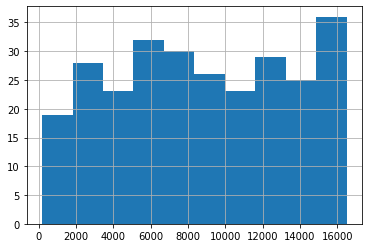

In [12]:
df[df.Year.isna()].Rank.hist()

Some high-selling games are missing year value and we might want to include that.

In [13]:
df[df.Year.isna()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


Looks like we may be able to infer the year that a game was released by the title: let's assume that Madden NFL 2004 was released in 2004. This should fix at least the highest ranking games.

In [14]:
def get_year_from_name(data):
    '''Extract Year from Name of a game and fill NaN Year value'''
    
    # remove all non-digits from Name and use that as the year
    year_from_name = data[data.Year.isna()].Name.apply(lambda x: re.sub('[^\d]' , '', x)).replace('',np.nan)
    
    # if number is in range 85-99, then that's short for 1985-1999
    for y in range(85,100):
        year_from_name = year_from_name.replace('^' + str(y),'19' + str(y), regex=True)
        
    # skip 2000 because that might be a special number used in names and not refer to the year
    
    # if the number is 01-09 then that's short for 2001-2009
    for y in range(1,10):
        year_from_name = year_from_name.replace('^0' + str(y),'20' + str(y), regex=True)
    
    # any years that are left that are three characters long or fewer can't be converted
    year_from_name = year_from_name.replace('^.{1,3}$',np.nan, regex=True)
    
    data['Year_inf'] = data.Year
    data.loc[data.Year_inf.isna(),'Year_inf'] = year_from_name
    
    return data

In [15]:
df = get_year_from_name(df)
df[(df.Year.isna()) & (~df.Year_inf.isna())]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_inf
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,2004
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,2004
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,2006
1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46,1999
1649,1651,NASCAR Thunder 2003,PS2,NaN,Racing,Unknown,0.60,0.46,0.00,0.16,1.22,2003
2497,2499,MLB SlugFest 20-03,PS2,NaN,Sports,Unknown,0.41,0.32,0.00,0.11,0.83,2003
2586,2588,PES 2009: Pro Evolution Soccer,PSP,NaN,Sports,Konami Digital Entertainment,0.04,0.33,0.26,0.17,0.80,2009
3501,3503,Madden NFL 2002,XB,NaN,Sports,Unknown,0.53,0.02,0.00,0.03,0.58,2002
4797,4799,NFL GameDay 2003,PS2,NaN,Sports,Unknown,0.20,0.15,0.00,0.05,0.40,2003
5162,5164,NBA Live 2003,XB,NaN,Sports,Electronic Arts,0.31,0.04,0.00,0.01,0.36,2003


Looks like there's one mistake (99 Dragons), but for the most part, the mapping makes sense and corrects most of the higher selling games.

Note that here you can also see that some of the Sales are 0.00 meaning that those games may not have been sold in those regions (or sold fewer than a million copies). We may want to look at those separately.

Let's finish up our cleaning by removing all games released after 2016 and any games for which we still don't have the years.

In [16]:
df.loc[df.Name.str.contains('99 Dragons'), 'Year_inf'] = np.NaN
df = df[(~df.Year_inf.isna()) & (df.Year < 2017)]
df.shape

(16323, 12)

In [17]:
# doublecheck that global sales are the totals of all sales (within a rounding error of 0.1 per region)
any(df.NA_Sales+df.EU_Sales+df.JP_Sales+df.Other_Sales - df.Global_Sales > 0.04)

False

## EDA

Let's start by looking at games by genre, platform, publisher, and year.

### Releases

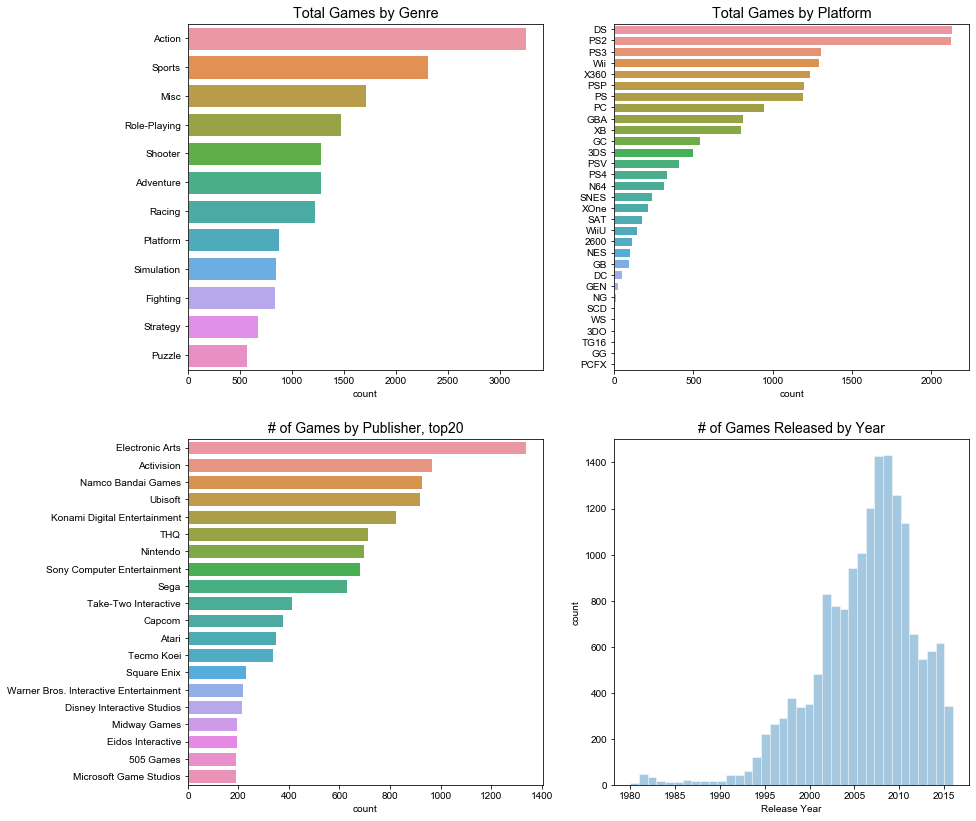

In [18]:
# set up subplots
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False, figsize=(14, 14))
sns.set(font_scale=1)
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize': (6, 6)})
sns.set_context('notebook', font_scale=1.2)

# plot Genre
ax1 = sns.countplot(y='Genre', data=df,
                    order=df.Genre.value_counts().index.tolist(),
                    ax=axs[0, 0])
ax1.set(ylabel='', title='Total Games by Genre')

# plot Platform
ax2 = sns.countplot(y='Platform', data=df,
                    order=df.Platform.value_counts().index.tolist(),
                    ax=axs[0, 1])
ax2.set(ylabel='', title='Total Games by Platform')

# plot Publisher, show top 20
ax3 = sns.countplot(y='Publisher', data=df,
                    order=df.Publisher.value_counts().iloc[:20].index.tolist(),
                    ax=axs[1, 0])
ax3.set_title('# of Games by Publisher, top20', fontsize=14)
ax3.set(ylabel='')

# plot Year
nYears = len(df.Year_inf.unique())
ax4 = sns.distplot(df['Year_inf'], kde=False, bins=nYears)
ax4.set_title('# of Games Released by Year', fontsize=14)
ax4.set(xlabel='Release Year', ylabel='count')
plt.show()

Observations:

A decline in video game releases after 2010?

Important to remember that in the final chart, we're looking at *releases* not sales. These likely lag the releases of video game platforms by a few years -- initially only a few games are available and then more are released over time until the next "generation" (e.g. PS3 vs. PS2) of the system is released. A quick wiki search finds that after the PS3 and Wii release in 2006, there are no new consoles released until WiiU in 2012. This likely accounts for the drop in game releases around 2010/2011 before the next generation of consoles is released. I'm not sure when these data were collected, but I would expect the numbers to tick back up in 2016 onward and, if all platforms are released within a year of each other every ~6 years, this may be he beginning of a periodic pattern.

In [19]:
# Is each game only released on one system?
df.Name.value_counts().head(10)

Need for Speed: Most Wanted                12
LEGO Marvel Super Heroes                    9
Ratatouille                                 9
FIFA 14                                     9
The LEGO Movie Videogame                    8
Lego Batman 3: Beyond Gotham                8
LEGO Jurassic World                         8
Madden NFL 08                               8
LEGO The Hobbit                             8
LEGO Star Wars II: The Original Trilogy     8
Name: Name, dtype: int64

In [20]:
df[df.Name=='Monopoly']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_inf
653,655,Monopoly,PC,1994.0,Misc,Hasbro Interactive,1.49,0.81,0.0,0.10,2.39,1994
896,898,Monopoly,Wii,2008.0,Misc,Electronic Arts,0.87,0.85,0.0,0.20,1.92,2008
1250,1252,Monopoly,PS,1997.0,Misc,Hasbro Interactive,1.18,0.27,0.0,0.05,1.51,1997
3375,3377,Monopoly,X360,2008.0,Misc,Electronic Arts,0.34,0.20,0.0,0.06,0.60,2008
4546,4548,Monopoly,PS2,2008.0,Misc,Electronic Arts,0.21,0.16,0.0,0.05,0.43,2008
5253,5255,Monopoly,PS3,2008.0,Misc,Electronic Arts,0.25,0.06,0.0,0.04,0.36,2008
6183,6185,Monopoly,DS,2010.0,Misc,Electronic Arts,0.16,0.10,0.0,0.03,0.28,2010
7412,7414,Monopoly,N64,1999.0,Misc,Hasbro Interactive,0.17,0.04,0.0,0.00,0.21,1999


There are two things going on here: Games released at very different times we should probably treat as separate games (e.g. 1994, 1997, 1999, and 2008 releases). Games released the same year by the same publisher are likely the same game, but on different systems. This may matter later in determine whether a game is successful or not.

What are the top games of the top 3 genres?

In [21]:
df[df.Genre=='Action'].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_inf
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40,2013
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,2004
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,2013
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,2002
38,39,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10,2001


In [22]:
df[df.Genre=='Sports'].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_inf
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2006
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2009
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72,2007
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00,2009
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49,2015


In [23]:
df[df.Genre=='Misc'].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_inf
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,2006
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82,2010
19,20,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22,2005
60,61,Just Dance 3,Wii,2011.0,Misc,Ubisoft,6.05,3.15,0.00,1.07,10.26,2011
68,69,Just Dance 2,Wii,2010.0,Misc,Ubisoft,5.84,2.89,0.01,0.78,9.52,2010


Wii Sports and Kinect Adventures are default games that came with the systetms, so perhaps it's not suprising that the most units of those have been sold. Perhaps they should be removed for subsequent analyses, but I won't do so here.

### Sales

In [24]:
# helper function for aggregation and sorting data for plotting
def sales_by_x(data, field):
    '''Get total sales from data aggregated by field in descending order'''
    gsp = data[['Global_Sales', field]].groupby([field])\
        .sum()\
        .reset_index()\
        .sort_values(by='Global_Sales', ascending=False)

    return gsp

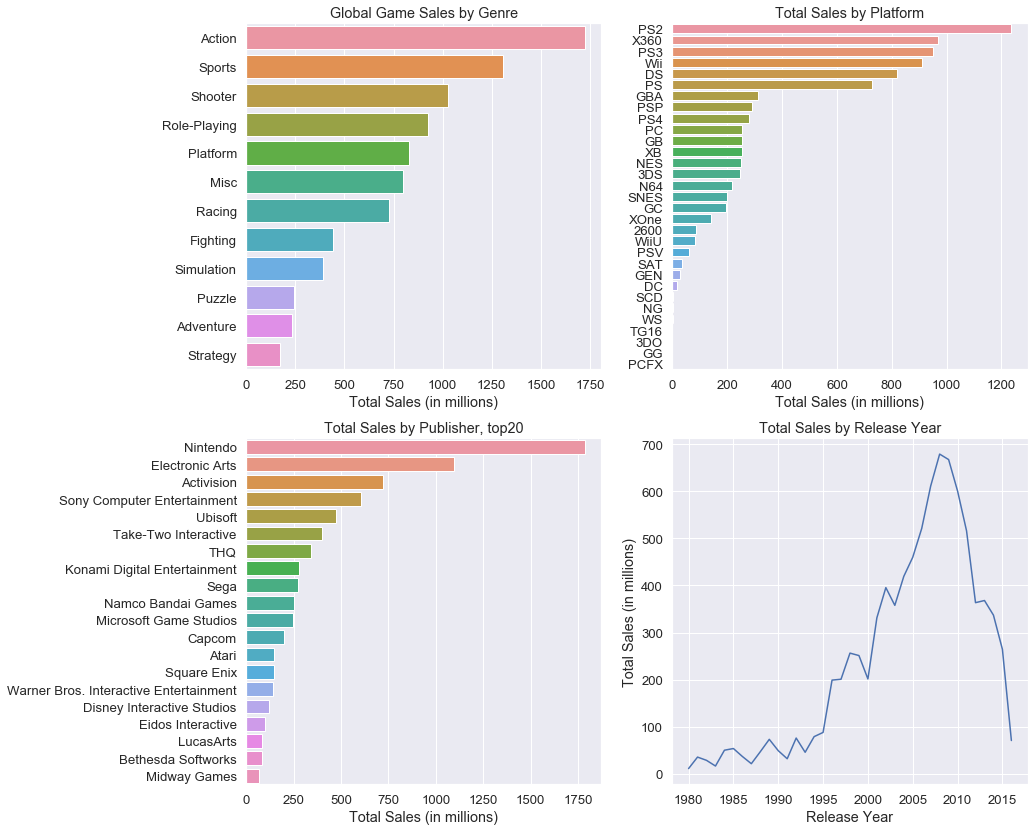

In [25]:
# set up subplots
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False, figsize=(14, 14))
sns.set(font_scale=1)
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize': (6, 6)})
sns.set_context('notebook', font_scale=1.2)

# plot Genre
ax1 = sns.barplot(y='Genre', x='Global_Sales',
                  data=sales_by_x(df, 'Genre'), ax=axs[0, 0])
ax1.set(xlabel='Total Sales (in millions)',
        ylabel='', title='Global Game Sales by Genre')

# plot Platform
ax2 = sns.barplot(y='Platform', x='Global_Sales',
                  data=sales_by_x(df, 'Platform'), ax=axs[0, 1])
ax2.set(xlabel='Total Sales (in millions)',
        ylabel='', title='Total Sales by Platform')

# plot Publisher, show top 20
ax3 = sns.barplot(y='Publisher', x='Global_Sales',
                  data=(sales_by_x(df, 'Publisher')).iloc[:20], ax=axs[1, 0])
ax3.set(xlabel='Total Sales (in millions)',
        ylabel='', title='Total Sales by Publisher, top20')

# plot Year
ax4 = sns.lineplot(x='Year_inf', y='Global_Sales',data=sales_by_x(df, 'Year_inf'),
                  ax=axs[1,1])
# ax4.set_title('# of Games Released by Year', fontsize = 14)
ax4.set(xlabel='Release Year', ylabel='Total Sales (in millions)', title='Total Sales by Release Year')
plt.show()

In [26]:
gpop = df.groupby('Platform').agg('size').sort_values(ascending=False).index.to_list()
cols2 = sns.color_palette('hls', n_colors=len(gpop))
ptc = [cols2[gpop.index(k)] for k in sales_by_x(df, 'Platform').Platform.to_list()]

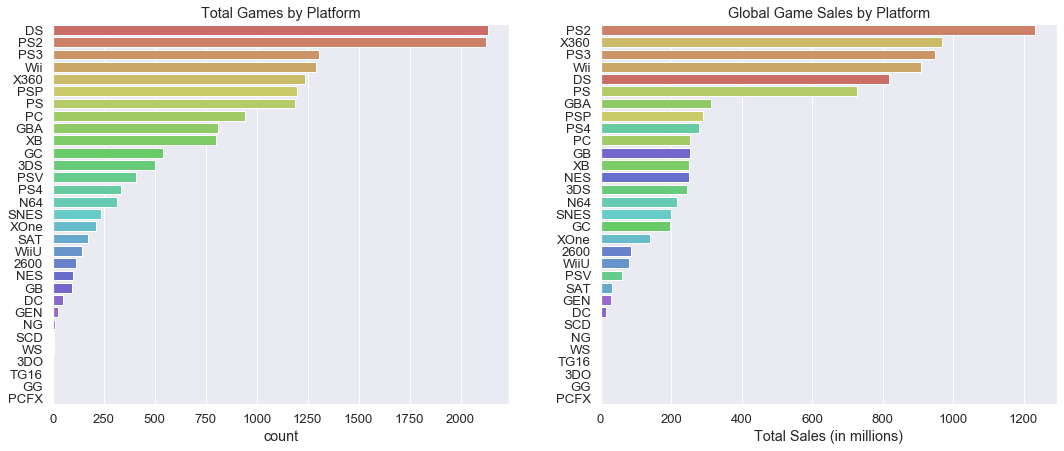

In [27]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(18, 7))
sns.set(font_scale=1)
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize': (6, 6)})
sns.set_context('notebook', font_scale=1.2)

ax1 = sns.countplot(y='Platform', data=df,
                    order=df.Platform.value_counts().index.tolist(),
                    ax=axs[0],
                    palette = cols2)
ax1.set(ylabel='', title='Total Games by Platform')

ax2 = sns.barplot(y='Platform', x='Global_Sales',
                data=sales_by_x(df, 'Platform'), ax=axs[1],
                palette = ptc)
ax2.set(xlabel='Total Sales (in millions)',
        ylabel='', title='Global Game Sales by Platform')
plt.show()

Observations:

1. Action, sports and shooter games are the most popular games.
2. There is some misalignment here with what games are being released: there are fewer shooter games than roleplaying games released, but they sell better. Misc games are released most often, but don't sell that well. This warrants further exploration below
3. Playstation (PS1-3) games are in the top 6 most sold games, followed by Nintendo (Wii, DS). 
4. XBox360 is the first competitive platform from Microsoft in terms of number of sales of games
5. Nintendo is the publisher of its own games so it is not suprising that they hey have the most sales of games given that they have been making games for a long time for many of their systems.
6. Video game sales pick up steam in 1995 and grow at a fast rate of an additional 50 million sales per year from 1995-2008 when the financial crisis hits. Then there's a sharp dip back to pre-2000 levels and the market has not yet recovered (as of midway through 2016 when this dataset is presumably from). 

We can also briefly look at the distribution of sales. Not surprisingly, this distribution has a long tail:

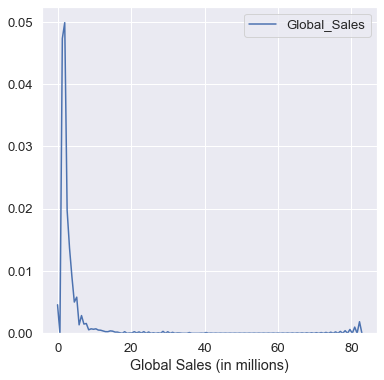

In [28]:
ax = sns.kdeplot(df.Global_Sales)
ax.set(xlabel='Global Sales (in millions)')
plt.show()

### Market Misalignment

To more clearly compare # of games vs. sales, let's recolor the sales data to match the color scheme of the numbers data:

In [29]:
games_production_order_by_genre = df.groupby('Genre').agg('size').sort_values(ascending=False).index.to_list()
cols = sns.color_palette('hls', n_colors=12)
plot_cols = [cols[games_production_order_by_genre.index(k)] for k in sales_by_x(df, 'Genre').Genre.to_list()]

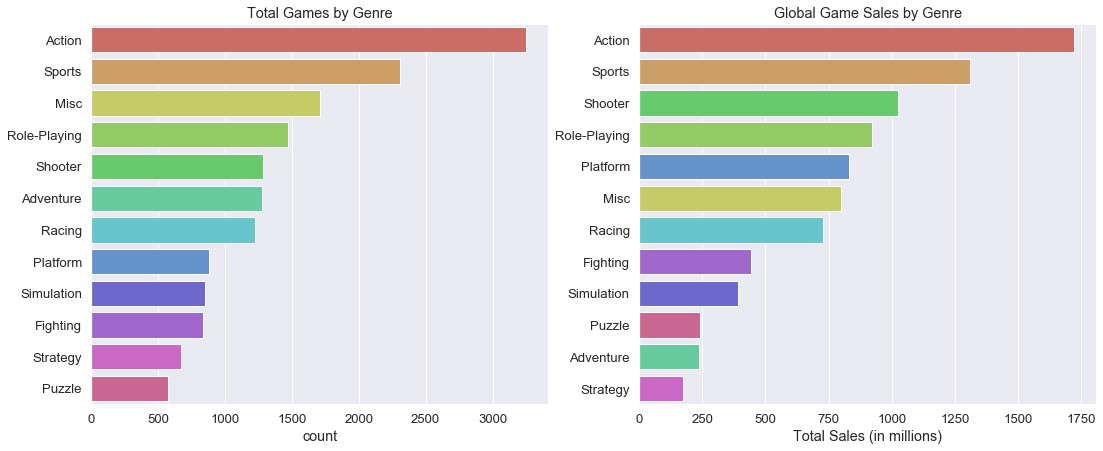

In [30]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(18, 7))
sns.set(font_scale=1)
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize': (6, 6)})
sns.set_context('notebook', font_scale=1.2)

ax1 = sns.countplot(y='Genre', data=df,
                    order=df.Genre.value_counts().index.tolist(),
                    ax=axs[0],
                    palette = cols)
ax1.set(ylabel='', title='Total Games by Genre')

ax2 = sns.barplot(y='Genre', x='Global_Sales',
                data=sales_by_x(df, 'Genre'), ax=axs[1],
                palette = plot_cols)
ax2.set(xlabel='Total Sales (in millions)',
        ylabel='', title='Global Game Sales by Genre')
plt.show()

In [31]:
# looking into market misalignment in terms of total sales vs. # of games by genre
global_sales_by_genre = df.groupby('Genre').agg(['sum','count']).Global_Sales.reset_index()
global_sales_by_genre.columns = ['Genre','sales','releases']

global_sales_by_genre['salesprop'] = global_sales_by_genre.sales / global_sales_by_genre.sales.sum()
global_sales_by_genre['releaseprop'] = global_sales_by_genre.releases / global_sales_by_genre.releases.sum()

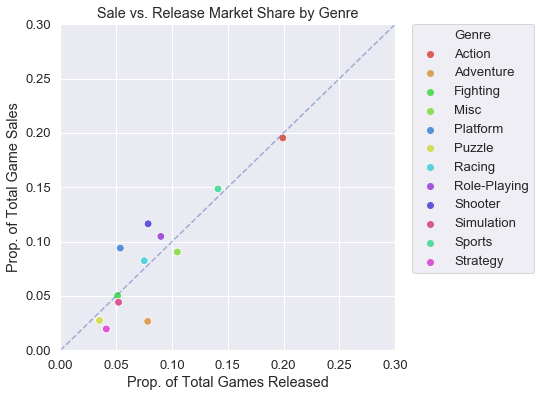

In [32]:
ax = sns.scatterplot(x='releaseprop', y='salesprop',
                     data=global_sales_by_genre, hue='Genre', s=60,
                     palette=plot_cols)
                    #palette=sns.color_palette('hls',12))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.plot([0, 1], [0, 1], '--', transform=ax.transAxes, alpha=0.5)
ax.set(ylim=(0, 0.3), xlim=(0, 0.3), 
       title='Sale vs. Release Market Share by Genre',
       xlabel='Prop. of Total Games Released',
      ylabel='Prop. of Total Game Sales')
plt.show()

Observations:

1. Shooters and Platform games have an outsized market share in terms of sales compared to the number of games of that genre that are released.
2. Adventure games make up 7% of the market in terms of #, but only 2.5% in terms of sales. 
3. Game makers should consider making more Platform and Shooter games, in addition to Action and Sports games which also sell well.

### Genres x Platforms

Are certain game genres more likely to appear on certain platforms?

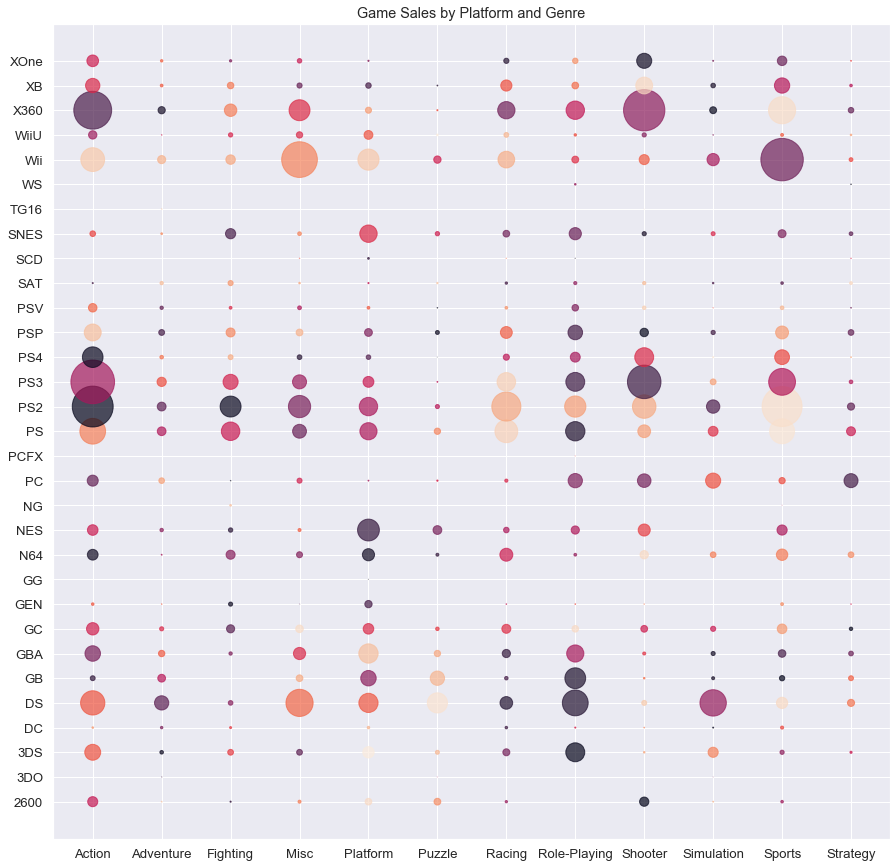

In [33]:
df_plat_gen = pd.pivot_table(df, index='Platform', columns='Genre', 
                             values='Global_Sales', aggfunc=np.sum)

x, y = np.meshgrid(df_plat_gen.columns, df_plat_gen.index)
colors = np.random.rand(len(df_plat_gen.values.flatten()))
plt.figure(figsize=(15, 15))
plt.rcParams.update({'font.size': 13})

#df_value *= 25
plt.scatter(x=x.flatten(), y=y.flatten(), s=2*df_plat_gen.values.flatten()**1.2, 
            c=colors,  alpha=0.7)
plt.margins(.05)
plt.title('Game Sales by Platform and Genre')
plt.show()

Observations:

1. PS2 and Wii have the widest variety in game genres on their systems. 
2. Misc. games are more likely to appear on Nintendo (DS, Wii) systems.
3. Shooter games are popular on X360, PS3 and PS2. 
4. Fighter games are most popular on PS
5. Puzzle games are most popular on DS.

## Q1: Comparing Markets

### Sales
Let's start by grouping by year and looking at market size and share.

In [34]:
sales_by_year = df.groupby('Year_inf').agg('sum')[['NA_Sales','EU_Sales','JP_Sales','Global_Sales']]

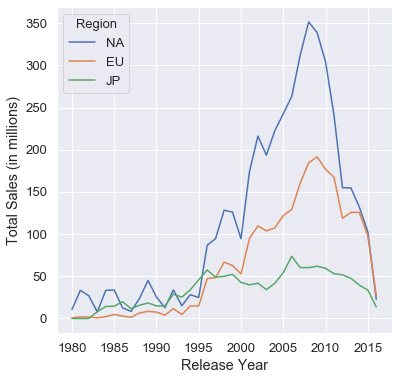

In [35]:
# Total sales by year
ax = sns.lineplot(x='Year_inf', y='value', hue='variable', \
                  data=pd.melt(sales_by_year[['NA_Sales','EU_Sales','JP_Sales']].reset_index(), ['Year_inf']))
ax.set(ylabel='Total Sales (in millions)',xlabel='Release Year')
_ = ax.legend(title = 'Region', labels=['NA','EU','JP'], loc='upper left')

Observations:

1. JP market grew until 1995, but then remained fairly stable in terms of sales until present day
2. Since 1995, NA market is roughly twice the size of EU market until ~2012. From around then, EU and NA sales have been similar.

In [36]:
# Market share by year
sales_by_year_perc = sales_by_year[['NA_Sales','EU_Sales','JP_Sales']].div(sales_by_year.Global_Sales,axis=0)*100

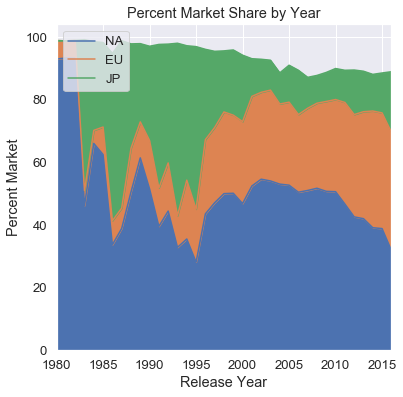

In [37]:
sales_by_year_perc.plot.area()
plt.legend(loc='upper left', labels=['NA','EU','JP'])
plt.margins(0,0)
plt.title('Percent Market Share by Year')
#plt.xticks(rotation = 45)
plt.ylabel('Percent Market')
plt.xlabel('Release Year')
plt.show()

Observations:

1. From 1981-1995, NA and JP dominated the market. 
2. From 1995-2016, EU marketshare has grown from 10% to 40% while the Japanese market has shrunk with the opposite pattern. 
3. "Other Markets" have slowly grown from virtually no market share to ~10% since the 1980's, but have been stable since around 2000

NB: Remember that we are looking at game release year, but a game may be sold for a long period of time after that. We're assuming that a majority of the sales happen right away, but we know that's not true for things like Wii and other Nintendo systems where there were limited numbers of consoles available soon after release.

### Genre

In [38]:
sales_by_genre = df.groupby(['Genre']).agg('sum')[['NA_Sales','EU_Sales','JP_Sales']].sort_values(by='NA_Sales',ascending=False)

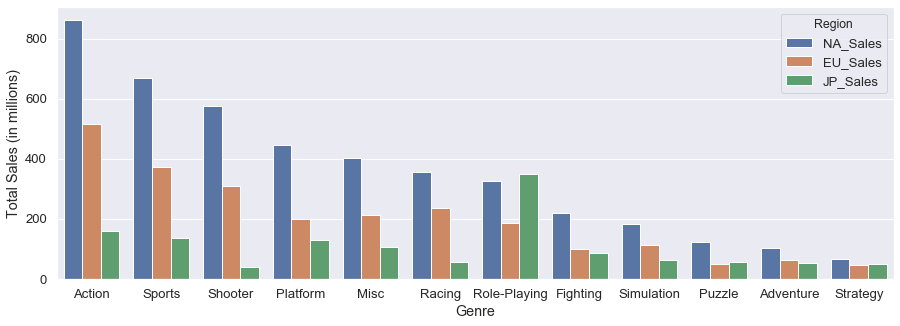

In [39]:
# Plot sales by Genre and region
plt.figure(figsize=(15,5))
ax = sns.barplot(x='Genre', y='value', hue='variable', data=pd.melt(sales_by_genre.reset_index(),['Genre']))
ax.set(ylabel='Total Sales (in millions)')
ax.legend_.set_title('Region')
plt.show()

Observations:

1. NA and EU are very similar in terms of which genre of games are bought most frequently.
2. Top 3 genres in terms of sales in NA and EU are Action, Sports, and Shooter games.
3. Japan's \#1 game genre is Role-Playing, which is not in the top-5 for either NA or EU. Shooter games, which are the third most popular type of games in NA and EU are least popular in Japan.

Let's combine with release data in the same way as before to see if there are different genres to target for each market.

In [40]:
# looking into market misalignment in terms of total sales vs. # of games by genre
def sales_by_genre_by_region(data, region):
    '''compute market share in terms of sales and releases for a region (NA, EU, JP)'''

    region += '_Sales'
    sgr = data[data.Year_inf >= 2011].groupby('Genre').agg(['sum', 'count'])[region].reset_index()
    sgr.columns = ['Genre', 'sales', 'releases']
    sgr['salesprop'] = sgr.sales / sgr.sales.sum()
    sgr['releaseprop'] = sgr.releases / sgr.releases.sum()

    return sgr


def plot_sgr(data, region, axs=None):
    '''plot sales by genre by region data'''

    ax = sns.scatterplot(x='releaseprop', y='salesprop',
                         data=data, hue='Genre', s=60,
                         palette=plot_cols,
                         ax=axs)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.plot([0, 1], [0, 1], '--', transform=ax.transAxes, alpha=0.5)
    ax.set(ylim=(0, 0.4), xlim=(0, 0.4),
           title='Sale vs. Release Market Share by Genre in ' + region,
           xlabel='Prop. of Total Games Released',
           ylabel='Prop. of Total Game Sales')

    return ax

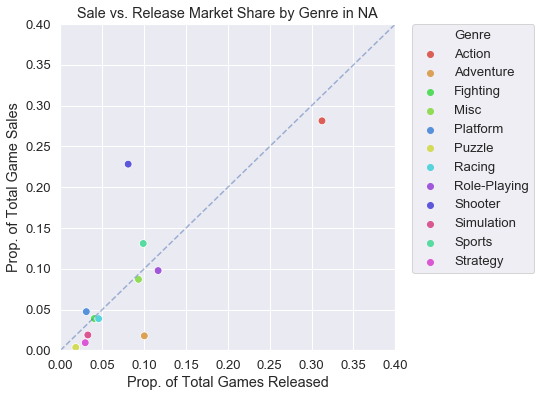

In [41]:
ax = plot_sgr(sales_by_genre_by_region(df,'NA'),'NA')
plt.show()

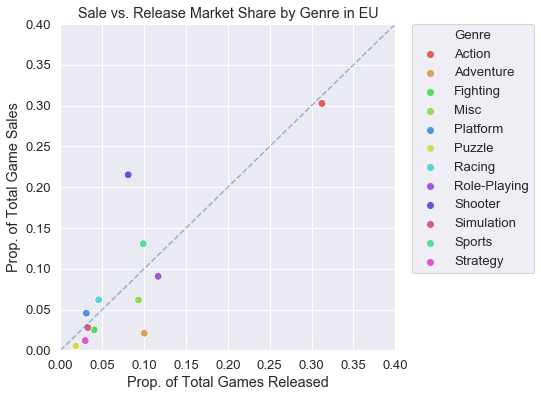

In [42]:
ax2 = plot_sgr(sales_by_genre_by_region(df,'EU'),'EU')
plt.show()

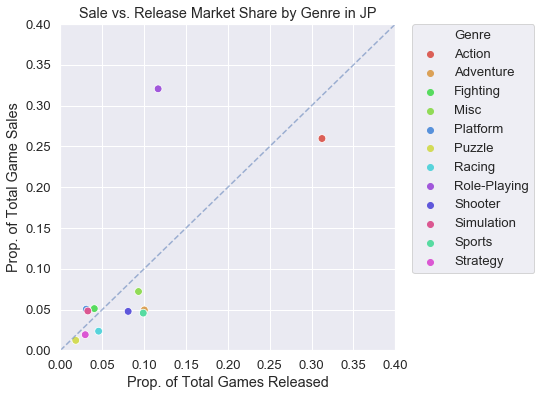

In [43]:
ax3 = plot_sgr(sales_by_genre_by_region(df,'JP'),'JP')
plt.show()

Observations:

1. NA and EU markets are fairly similar: there are too many Adventure and Strategy games released and not enough Shooter and Platform games.
2. EU market may want to see more racing games
3. JP market does not care for Action, Sports, or Shooter games. Game makers should focus more on Platform and Fighting games.

### Platform

In [44]:
sales_by_platform = df.groupby(['Platform']).agg('sum')[['NA_Sales','EU_Sales','JP_Sales']].sort_values(by='NA_Sales',ascending=False)

[Text(0, 0.5, 'Total Sales (in millions)')]

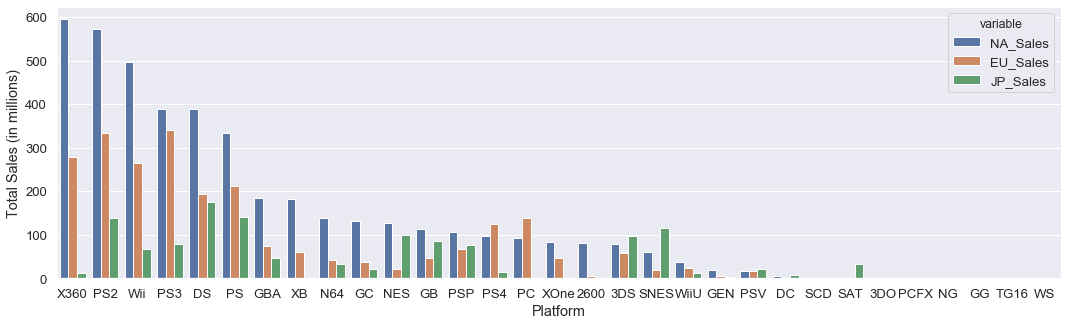

In [45]:
plt.figure(figsize=(18,5))
ax = sns.barplot(x='Platform', y='value', hue='variable', data=pd.melt(sales_by_platform.reset_index(),['Platform']))
ax.set(ylabel='Total Sales (in millions)')

Observations: 

1. North America and EU are fairly similar in their platform preferences. Playstation products may have a slight edge over Microsoft products in EU, while no similar pattern is obvious in North America. 
2. Japan really stands out for having very few or no microsoft-made platform sales (X360, XBox, XOne) and instead being dominated by Playstation (except PS4, but it was only released at the end of 2014, so maybe it is just too recent) and Nintendo.
3. Japan also has a preference for handheld systems (DS, GB, PSP) compared to US and European markets
4. PC numbers look surprisingly small from what I would have expected. There is a system called PC, but I don't think that's it. I think it's actually PCs. Virtually no PC game sales in JP (of 100k+). 

### Publisher

In [46]:
# Market share by Publisher

# Adding up all sales does not always exactly equal global sales when there is rounding.
# This didn't matter when aggregating by year, but does by publisher, if the publisher released few games
df['Global_Sales_corrected'] = df.NA_Sales + df.EU_Sales + df.JP_Sales + df.Other_Sales
sales_by_publisher = df.groupby('Publisher').agg('sum')[['NA_Sales','EU_Sales','JP_Sales','Global_Sales_corrected']]
sales_by_publisher_perc = \
    sales_by_publisher.div(sales_by_publisher.Global_Sales_corrected,axis=0)*100
sales_by_publisher_perc.sort_values(by=['NA_Sales','EU_Sales','JP_Sales'], inplace = True)

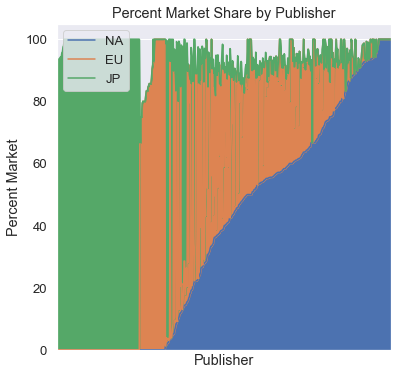

In [47]:
sales_by_publisher_perc[['NA_Sales','EU_Sales','JP_Sales']].plot.area()
plt.legend(loc='upper left', labels=['NA','EU','JP'])
plt.xticks([], [])
plt.title('Percent Market Share by Publisher')
plt.ylabel('Percent Market')
plt.xlabel('Publisher')
plt.show()

Observations:

1. Some publishers dominate a very specific regional market (NA, EU, or JP). There are many more such publishers for JP meaning that they only sell their games in Japan and make them for Japanese audiences.
2. About 50% of the publishers have equally penetrated the NA and EU markets.
3. There are relatively few games that appeal equally to all markets and almost no games that appeal equally to EU and JP, although there are some that appeal to NA+JP or NA+EU

## Q2: Genre Trends

Let's start by looking at how, in each market, the proportion of games of each genre are changing over time

In [48]:
def pSales_genre_year_region(data, region):
    '''Proportion market share by year and genre for a particular region'''

    region += '_Sales'
    pSales = df[['Year_inf', 'Genre', region]].groupby(['Year_inf', 'Genre']).sum() \
        / df[['Year_inf', region]].groupby(['Year_inf']).sum() * 100
    pSales = pd.pivot_table(pSales, values=region, index='Year_inf', columns='Genre')

    return pSales


def plot_pSales(ps, region):
    '''Plot pSales_genre_year_region data'''
    
    ax = ps.plot.area(colormap='Set3')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.margins(0, 0)
    plt.title(region + ' Market Share by Genre by Year')
    # plt.xticks(rotation = 45)
    plt.ylabel('Percent Market Share')
    plt.xlabel('Release Year')
    
    return ax

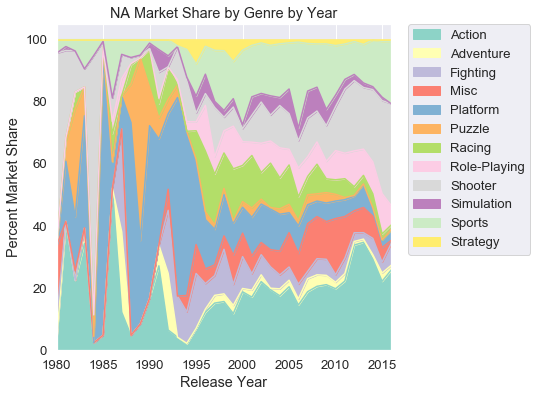

In [49]:
ax = plot_pSales(pSales_genre_year_region(df, 'NA'), 'NA')
plt.show()

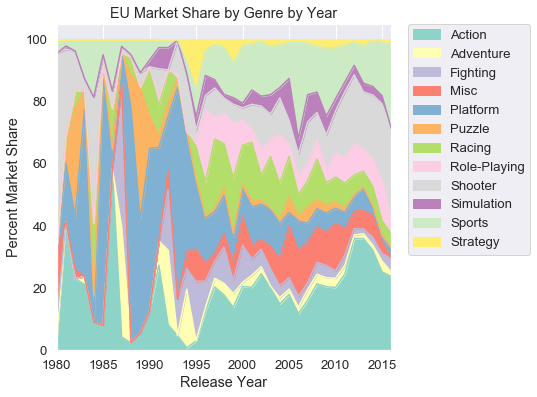

In [50]:
ax = plot_pSales(pSales_genre_year_region(df, 'EU'), 'EU')
plt.show()

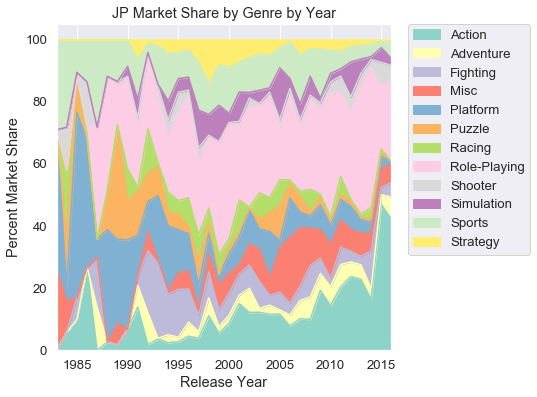

In [51]:
ax = plot_pSales(pSales_genre_year_region(df, 'JP'), 'JP')
plt.show()

Observations:

1. Genre sale trends are very similar in NA and EU in recent years. In both markets, Action, Shooter, and Sports games are dominating, followed by Role-Playing. Misc. games have become very unpopular in the last 3 years in those regions compared to 2010 and before. In the last 2-3 years that data is available, there is a slight uptick in Fighting game sales.
2. EU is seeing a faster growth in Sports game sales in the last 5 years compared to NA. 
3. JP is a very different market. Role-playing games have remained popular for the last 20 years, but Action games are dominating more and more of the market. Since these are also popular in NA and EU, this could be a good genre to target. Unlike EU and NA, Misc games continue to be popular while Sports games have been losing popularity. Shooter games are also becoming more popular in the last 5 years and that may be another area of potential growth. 
4. We should also be careful in comparing pre-1995 data to post-1995 data. There were fewer games released then (see chart in EDA section) with fewer than 100 games in some years. That means that if a particular game was very popular or unpopular, it could dominate the sales for that genre. This is likely why there is so much fluctuation in the data before 1995 and rather stable #s after. 

NB: X axis is release year, so making tacit assumption that game sale numbers for a given year reflect the games that were released that year or perhaps the year before.

Are the action games that each market likes the same?

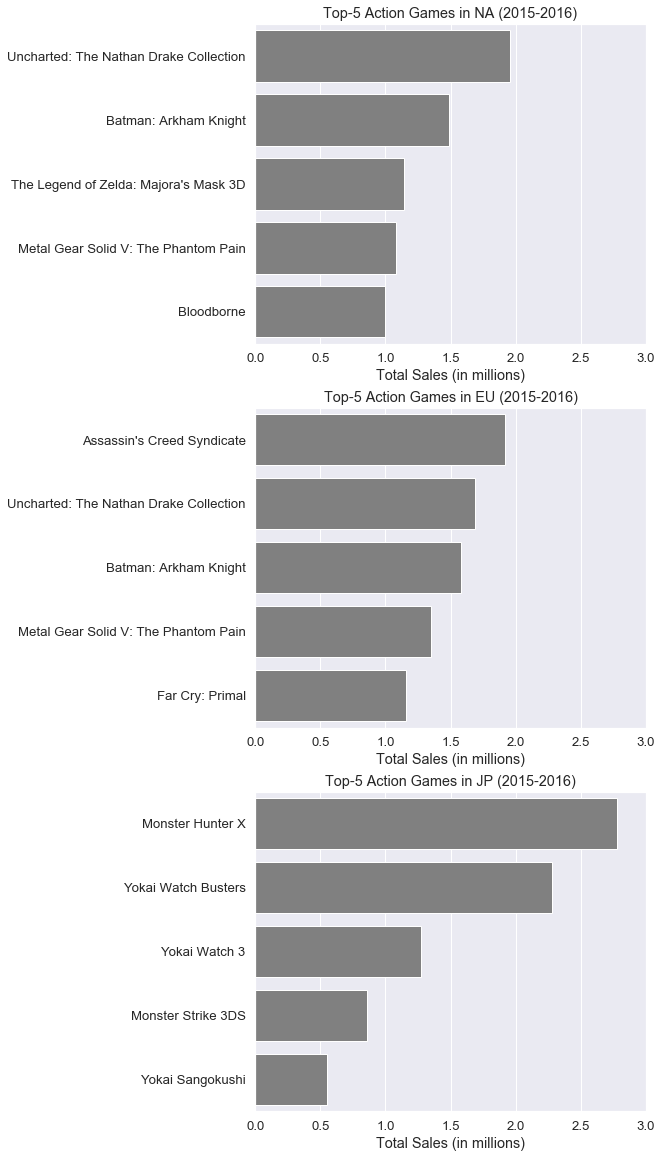

In [52]:
df_action_recent = df[(df.Genre=='Action') & (df.Year_inf>=2015)]

fig, axs = plt.subplots(nrows=3, ncols=1, sharex=False, figsize=(7, 20))
sns.set(font_scale=1)
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize': (6, 6)})
sns.set_context('notebook', font_scale=1.2)

ax1 = sns.barplot(y='Name', x='NA_Sales', 
                  data=df_action_recent.sort_values(by='NA_Sales', ascending=False).head(5), 
                  ax=axs[0], color='gray')
ax1.set(xlabel='Total Sales (in millions)',
        ylabel='', title='Top-5 Action Games in NA (2015-2016)', xlim=(0,3))

ax2 = sns.barplot(y='Name', x='EU_Sales', 
                  data=df_action_recent.sort_values(by='EU_Sales', ascending=False).head(5),
                  ax=axs[1], color='gray')
ax2.set(xlabel='Total Sales (in millions)',
        ylabel='', title='Top-5 Action Games in EU (2015-2016)', xlim=(0,3))

ax3 = sns.barplot(y='Name', x='JP_Sales',
                  data=df_action_recent.sort_values(by='JP_Sales', ascending=False).head(5), 
                  ax=axs[2], color='gray')
ax3.set(xlabel='Total Sales (in millions)',
        ylabel='', title='Top-5 Action Games in JP (2015-2016)',  xlim=(0,3))
plt.show()

## Q3: Predicting Success

I take this to mean "What sort of a game should a publisher make **today**?" This is important because we don't want to suggest to them, for example, to make a PS2 game, which historically had been selling very well, given that the latest system is a PS4. Let's therefore only look at data from the last 5 years. That way, if no games have been released on a platform in that time, we won't need to consider the fact that that platform may have been successful in the fact, nor do we need to worry about publishers who had one successful game 10 years ago, but who no longer exist.

What does it mean for a game to be successful? Market dominance? 

In [53]:
df_pred = df[df.Year_inf>=2011]

In [54]:
df_pred = df_pred.dropna()

In [55]:
df_pred.shape

(3873, 13)

### Feature Engineering

The more systems a game is released on, the more confidence the company may have in the game's success to go through the expense of putting it out on multiple systems. On the other hand, if these are staggered, perhaps the success of the game on one system is what prompts its release on another. There is no good way to tell from these data.

In [56]:
# number of systems a game is released on
release_counts = df_pred.groupby(['Name']).count().reset_index()[['Name','Platform']]
release_counts.columns = ['Name','nSystems']
# since only looking since 2011, let's assume that the game is the same on all systems

df_pred = df_pred.merge(release_counts, how='left', on='Name')
df_pred.Year_inf = df_pred.Year_inf.astype('int')

If there is time, can do some NLP on the names of games to try to extract out whether or not they are part of a series, e.g. Super Mario, Zelda, Pokemon etc. Not enough time for this now.

### Modeling

Let's start with by one-hot encoding the categorical features and make separate models to predict success in each market. We will certainly need a separate model for Japan at the very least. This is going to create hundreds of features since there are many different Publishers. Will need to regularize (ridge/lasso) or use a random forest regressor that can handle lots of predictors + possible nonlinear relationships between them. We'll also stratify by year, although that likely doesn't matter if just looking at 5 years.

We'll look at median absolute error for our evaluation metric since it's a bit more interpretable and has some advantages over R2 for nonlinear models. It is also robust to outliers in our predictor variable. If there is more time, would be nice to put confidence intervals on this.

In [57]:
def make_dummies(df, region):
    """Encode categorical variables as dummies"""
    
    region += '_Sales'
    
    return pd.get_dummies(df[[region,'Publisher','Platform','Genre','nSystems','Year_inf']])


def split_data(df, region):
    """Train-test split of data, stratifying by year"""
    
    region += '_Sales'
    train_df, test_df = train_test_split(df.drop('Year_inf', axis=1), # don't use Year as a predictor
                                     test_size=.2, stratify=df['Year_inf'])
    train_x, train_y = train_df.iloc[:,1:], train_df[region]
    test_x, test_y = test_df.iloc[:,1:], test_df[region]
    
    return train_x, train_y, test_x, test_y    


def run_model(train_x, train_y, test_x, test_y):
    """train random forest regression and generate predictions"""
    rfr = RandomForestRegressor(max_depth = 10, n_estimators=100)
    rfr.fit(train_x,train_y)
    predict_train = rfr.predict(train_x)
    predict_test = rfr.predict(test_x)
    
    return rfr, predict_train, predict_test


def eval_model(train_y, test_y, predict_train, predict_test, region):
    """evaluate regression model performance"""
    print(region + ' train r2: ' + str(r2_score(train_y,predict_train)))
    print(region + ' train med abs err: ' + str(median_absolute_error(train_y,predict_train)))
    print(region + ' test r2: ' + str(r2_score(test_y,predict_test)))
    print(region + ' train med abs err: ' + str(median_absolute_error(test_y,predict_test)))

I've decided to go with random forest regression because of the large number of predictors and because of possible correlations between Genre and Platforms (see EDA). The dataset is also small enough that this should run very quickly. I'm not going to bother with hyperparameter tuning since I just want to get a rough sense of feature importance, so there will be no cross-validation. Using this model comes at the expense of easy interpretability and we're still not fully out of the woods (ha!) in terms of correlated predictors, but this is good enough for a first pass. 

If there is more time, a better model would be lightGBM or catBoost or the H20 implementation of random forests which can handle categorical natively. We will get in trouble with one-hot encoding in the random forest implementation, but, probably ok for a first, quick pass.

In [58]:
np.random.seed(100)

for region in ['NA', 'EU', 'JP']:
    df_pred_dum = make_dummies(df_pred, region)
    train_x, train_y, test_x, test_y = split_data(df_pred_dum, region)
    rfr, predict_train, predict_test = run_model(train_x, train_y, test_x, test_y)
    eval_model(train_y, test_y, predict_train, predict_test, region)
    print(pd.DataFrame({
        'feature': train_x.columns,
        'importance': rfr.feature_importances_}
    ).sort_values('importance', ascending=False).head(10))
    #shap_values = shap.TreeExplainer(rfr).shap_values(train_x)
    #shap.summary_plot(shap_values, train_x, plot_type = 'bar')
    print('')

NA train r2: 0.6126275447146072
NA train med abs err: 0.056268975353216566
NA test r2: 0.3430086095206354
NA train med abs err: 0.059049476522876905
                              feature  importance
0                            nSystems    0.213345
235                      Genre_Action    0.086548
243                     Genre_Shooter    0.077823
129  Publisher_Microsoft Game Studios    0.071867
233                     Platform_X360    0.071159
8                Publisher_Activision    0.069914
140                Publisher_Nintendo    0.040462
227                      Platform_PS3    0.034597
231                      Platform_Wii    0.032056
189    Publisher_Take-Two Interactive    0.029062

EU train r2: 0.7314150836500725
EU train med abs err: 0.04239257636875502
EU test r2: 0.27604760846449794
EU train med abs err: 0.04870018323697741
                       feature  importance
0                     nSystems    0.202399
235               Genre_Action    0.079184
227               Platf

Observations:

1. Nothing too surprising here that we haven't seen before: NA and EU are fairly similar, JP is very different.
2. Number of systems that a game comes out on is likely to predict success in NA and EU. We don't know which way causality goes: games that are published across many platforms may be anticipated to be popular or else popular games may get more releases over time
3. Action and Shooter games are popular in NA and EU. 
4. Preference for Microsoft and XBox360 in US vs. Playstation in EU
5. Sports games are popular in Europe
6. Nintendo games and systems are popular in Japan
7. Role-playing and simulation games are also popular

Simulation didn't come up in previous analyses so let's explore that a bit:

In [59]:
df_pred[df_pred.Genre=='Simulation'].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_inf,Global_Sales_corrected,nSystems
18,74,Animal Crossing: New Leaf,3DS,2012.0,Simulation,Nintendo,2.01,2.32,4.36,0.41,9.09,2012,9.10,1
47,189,Tomodachi Life,3DS,2013.0,Simulation,Nintendo,0.96,2.02,1.89,0.28,5.15,2013,5.15,1
80,322,Nintendogs + cats,3DS,2011.0,Simulation,Nintendo,1.44,1.37,0.73,0.27,3.81,2011,3.81,1
117,477,Animal Crossing: Happy Home Designer,3DS,2015.0,Simulation,Nintendo,0.47,1.00,1.39,0.12,2.98,2015,2.98,1
118,479,The Sims 4,PC,2014.0,Simulation,Electronic Arts,0.96,1.72,0.00,0.29,2.97,2014,2.97,1


In [60]:
df_pred['JP_sales_prop'] = df_pred.JP_Sales / df_pred.JP_Sales.sum()
df_pred[['Name','JP_sales_prop']].sort_values(by='JP_sales_prop',ascending=False).head()

,Name,JP_sales_prop
18,Animal Crossing: New Leaf,0.018226
3,Pokemon X/Pokemon Y,0.018142
93,Monster Hunter 4,0.014380
105,Yokai Watch 2 Ganso/Honke,0.013293
21,Pokemon Black 2/Pokemon White 2,0.013126


Looks like animal crossing is a very popular recent release (even more popular than Pokemon!). It accounts for 1.8% of all game sales in Japan in the since 2011, more than any other game, and only matched by Pokemon. Perhaps not so surprising then that a few years after this dataset was released, a new Animal Crossing game is one of the most popular games in the world!

## Conclusions

- Overall, EU and NA markets are very similar, while JP is very different
- Very few games are popular everywhere across the world
- Shooter and action games are more successful in NA and EU
- EU likes sports games and prefers Playstation over other platforms
- JP likes Nintendo games and handheld systems
- The EU market is now the same size as NA market
- The 2008 financial crash has more than halved video game sales worldwide and these numbers have not recovered
- To target JP market, make more platformers on handheld Nintendo systems

### Appendix

Just trying out LGBM here for fun. I get pretty much the same median absolute error. 

In [61]:
import lightgbm as lgb
from sklearn import preprocessing

In [62]:
le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
le3 = preprocessing.LabelEncoder()

In [63]:
df_pred = df_pred[~df_pred.Publisher.isna()]

In [64]:
df_pred['Platform_enc'] = pd.DataFrame(le1.fit_transform(df_pred.Platform))
df_pred['Genre_enc'] = pd.DataFrame(le2.fit_transform(df_pred.Genre))
df_pred['Publisher_enc'] = pd.DataFrame(le3.fit_transform(df_pred.Publisher))

In [65]:
df_pred = df_pred[~df_pred.Platform_enc.isna()]

In [67]:
np.random.seed(100)

train_x, train_y, test_x, test_y = \
    split_data(df_pred[['NA_Sales','Year_inf','Platform_enc','Genre_enc','Publisher_enc','nSystems']], 'NA')

In [68]:
d_train = lgb.Dataset(train_x, 
                      label=train_y, feature_name=['Platform_enc','Genre_enc','Publisher_enc','nSystems'], 
                      categorical_feature=['Platform_enc','Genre_enc','Publisher_enc'], free_raw_data=False)

In [69]:
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='regression'#regression task
params['n_estimators']=100
params['max_depth']=10

In [70]:
clf=lgb.train(params,d_train,100)

/Users/genna/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/genna/opt/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


In [71]:
y_pred=clf.predict(test_x)

In [72]:
median_absolute_error(y_pred,test_y)

0.06341437112664575

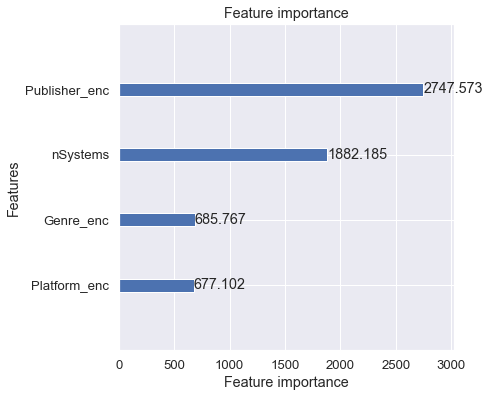

In [73]:
lgb.plot_importance(clf, importance_type='gain', max_num_features=20)
plt.show()